In [98]:
import math
import quandl
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from IPython.display import Markdown
import statsmodels.formula.api as sm
from matplotlib.ticker import PercentFormatter

def computeAnnualisedMeanReturn(daily_log_returns):
    return (daily_log_returns+1).product()**(1/(len(daily_log_returns))*252)-1

def computeAnnualisedStdDev(daily_log_returns):
    return daily_log_returns.std()*math.sqrt(252)

In [99]:
# Index Data
tickers = {
    "MSCI World" : {'Quandl':'CHRIS/EUREX_FMWO1', 
                    'Holding':24050, 
                    'Currency':'GBP'
                   },
    
    "MSCI Japan" : {'Quandl':
                    'CHRIS/EUREX_FMJP1', 
                    'Holding': 0,
                    'Currency':'GBP'
                   },
    
    "MSCI Europe" : {'Quandl':'CHRIS/EUREX_FMEU1', 
                     'Holding': 0,
                     'Currency':'GBP'
                    },
    
    "MSCI Emerging Markets" : {'Quandl':'CHRIS/EUREX_FMEM1', 
                               'Holding': 2200,
                               'Currency':'GBP'
                              },
    
    "MSCI Asia Ex-Japan" : {'Quandl':'CHRIS/EUREX_FMAS1', 
                            'Holding': 0, 
                            'Currency':'GBP'
                           },
    
    "FTSE 100" : {'Quandl':'CHRIS/LIFFE_Z1', 
                  'Holding': 0,
                  'Currency':'GBP'
                 },
    
    "S&P 500" : {'Quandl':'CHRIS/CME_SP1',
                 'Holding':0,
                 'Currency':'GBP'
                },
    
    "Euro STOXX 50" : {'Quandl':'CHRIS/EUREX_FESX1', 
                       'Holding': 0,
                       'Currency':'GBP'
                      }
}

In [100]:
# Index Data
tickerOne = 'CHRIS/EUREX_FMWO1'
data_raw = quandl.get(tickerOne, authtoken="vbGAyFgFrM9L4qLgEx_n")

for ticker in tickers:
    data_temp = quandl.get((tickers[ticker]['Quandl']), authtoken="vbGAyFgFrM9L4qLgEx_n")
    data_raw[(tickers[ticker]['Quandl'])[6:]] = data_temp['Settle']
    
data_raw = data_raw.drop(['Open', 'High', 'Low', 'Settle', 'Volume', 'Prev. Day Open Interest'], 1)

In [101]:
# Lookback Period
period = 60

# Computing Lookback Period Returns
for ticker in tickers:
    data_raw[(tickers[ticker]['Quandl'])[6:]+'periodma'] = data_raw[(tickers[ticker]['Quandl'])[6:]].rolling(window=period,center=False).mean()
    data_raw[(tickers[ticker]['Quandl'])[6:]+'dperiodma'] = data_raw[(tickers[ticker]['Quandl'])[6:]+'periodma'].shift(-1) - data_raw[(tickers[ticker]['Quandl'])[6:]+'periodma']
    data_raw[(tickers[ticker]['Quandl'])[6:]+'logret'] = np.log(data_raw[(tickers[ticker]['Quandl'])[6:]]).diff()
    data_raw.fillna(method='pad', inplace=True)
    data = data_raw.tail(period*8)

**Holdings & Portfolio Metrics on 30 September 2018**

Holdings:
91.62%	24050 GBP	MSCI World
8.38%	2200 GBP	MSCI Emerging Markets

Expected Portfolio Return: 16.0%


**Correlation Coefficient Matrix (most recent data from 27 September 2018)**

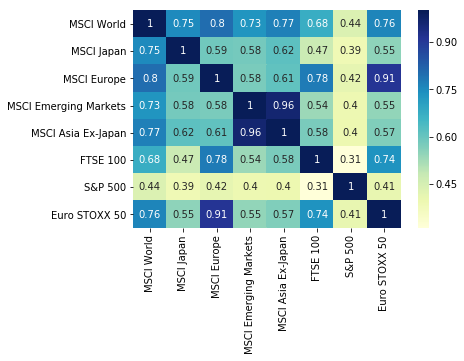

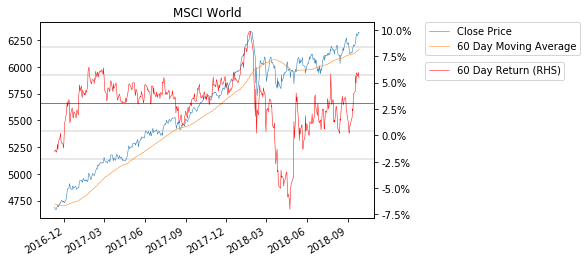

<br/>**Data & Technical Indicators for MSCI World**

Last Close: 6315.0

Mean 60 day return: 3.0335%; 2.6516% std dev

Current 60 day return: 5.5167%; 0.9365 std dev from mean<br/>

Annualised Return: 16.4419%

Annualised Volatility: 9.341%

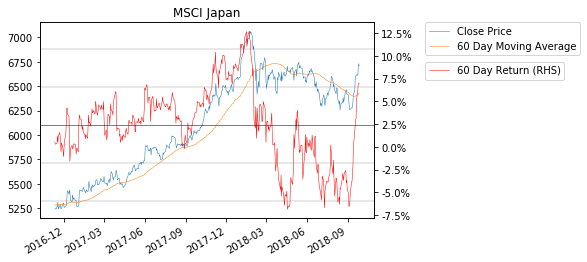

<br/>**Data & Technical Indicators for MSCI Japan**

Last Close: 6710.0

Mean 60 day return: 2.4087%; 4.2012% std dev

Current 60 day return: 6.9333%; 1.077 std dev from mean<br/>

Annualised Return: 13.0491%

Annualised Volatility: 10.6277%

60 day return is 1 std or more from its average. <span style="color: #ff0000">Keep an eye on this</span><br/>

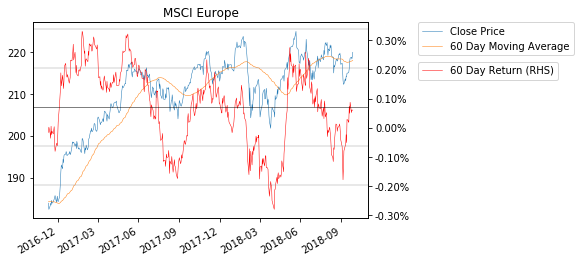

<br/>**Data & Technical Indicators for MSCI Europe**

Last Close: 219.9

Mean 60 day return: 0.0702%; 0.1337% std dev

Current 60 day return: 0.06%; -0.0765 std dev from mean<br/>

Annualised Return: 9.2779%

Annualised Volatility: 9.9837%

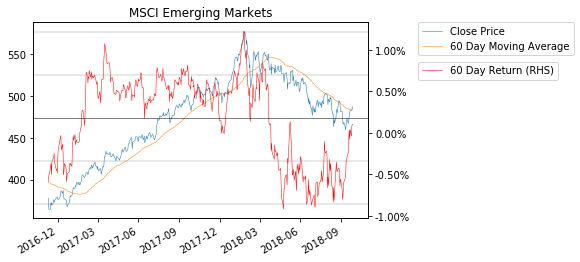

<br/>**Data & Technical Indicators for MSCI Emerging Markets**

Last Close: 487.0

Mean 60 day return: 0.1821%; 0.5203% std dev

Current 60 day return: 0.1033%; -0.1515 std dev from mean<br/>

Annualised Return: 11.225%

Annualised Volatility: 15.1907%

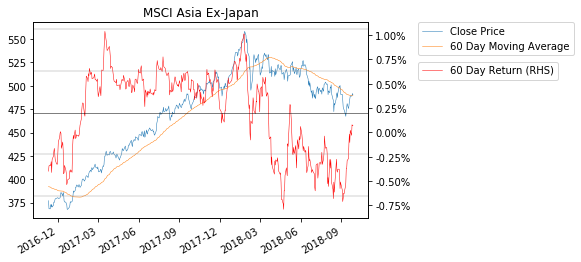

<br/>**Data & Technical Indicators for MSCI Asia Ex-Japan**

Last Close: 490.6

Mean 60 day return: 0.2034%; 0.4268% std dev

Current 60 day return: 0.07%; -0.3126 std dev from mean<br/>

Annualised Return: 12.8381%

Annualised Volatility: 12.9219%

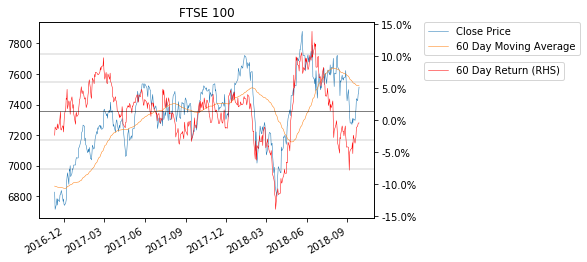

<br/>**Data & Technical Indicators for FTSE 100**

Last Close: 7514.0

Mean 60 day return: 1.3675%; 4.5298% std dev

Current 60 day return: -0.4417%; -0.3994 std dev from mean<br/>

Annualised Return: 4.2007%

Annualised Volatility: 10.5326%

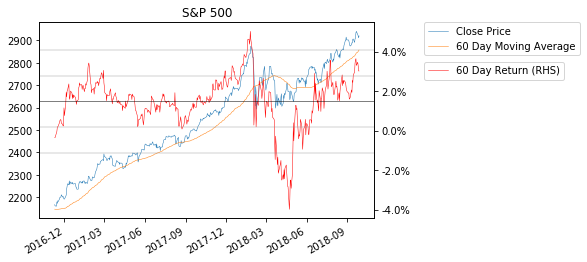

<br/>**Data & Technical Indicators for S&P 500**

Last Close: 2919.9

Mean 60 day return: 1.4859%; 1.3046% std dev

Current 60 day return: 3.0217%; 1.1772 std dev from mean<br/>

Annualised Return: 16.5201%

Annualised Volatility: 10.2161%

60 day return is 1 std or more from its average. <span style="color: #ff0000">Keep an eye on this</span><br/>

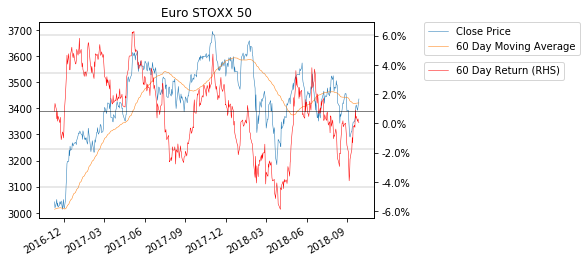

<br/>**Data & Technical Indicators for Euro STOXX 50**

Last Close: 3436.0

Mean 60 day return: 0.8487%; 2.609% std dev

Current 60 day return: 0.0667%; -0.2998 std dev from mean<br/>

Annualised Return: 5.7679%

Annualised Volatility: 11.988%

In [148]:
# Compute portfolio metrics
portfolioValue = 0 
for ticker in tickers:
    portfolioValue += tickers[ticker]['Holding']

today = datetime.date.today()
display (Markdown('**Holdings & Portfolio Metrics on '+today.strftime('%d %B %Y')+'**'))

# Compute Portfolio Holdings and Allocation Percents
print("Holdings:")
for ticker in tickers:
    if(tickers[ticker]['Holding'] > 0):
        print(str(round((tickers[ticker]['Holding']/portfolioValue)*100, 2))+'%'+"\t"+str(tickers[ticker]['Holding'])+' '+str(tickers[ticker]['Currency']+"\t"+ticker))

# Compute Portfolio Expected Return
sum = 0;
for ticker in tickers:
    if(tickers[ticker]['Holding'] > 0):
        sum += tickers[ticker]['Holding']/portfolioValue*computeAnnualisedMeanReturn(data[tickers[ticker]['Quandl'][6:]+'logret'])
print("\nExpected Portfolio Return: "+str(round(sum*100, 2))+'%')
        
# Compute Portfolio Correlation Coefficient Matrix 
display (Markdown('**Correlation Coefficient Matrix (most recent data from '+data.index[len(data.index) -1].strftime('%d %B %Y')+')'+'**'))
data_correls = data.filter(regex='logret')
corr = data_correls.corr()
sns.heatmap(corr, 
            xticklabels=tickers,
            yticklabels=tickers,
            annot=True, 
            cmap="YlGnBu")        

# Draw graphs
for ticker in tickers:
        
    fix, ax1 = plt.subplots() 
    ax2 = ax1.twinx()
    plt.gcf().autofmt_xdate()
        
    ax1.set_title(ticker)
    ax1.plot(data[(tickers[ticker]['Quandl'])[6:]], label="Close Price", linewidth=0.5)
    ax1.plot(data[(tickers[ticker]['Quandl'])[6:]+'periodma'], label=str(period)+" Day Moving Average", linewidth=0.5)
    ax1.legend(bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0.)
    
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax2.plot(data[(tickers[ticker]['Quandl'])[6:]+'dperiodma'], label=str(period)+" Day Return (RHS)", color = 'r', linewidth=0.5)
    ax2.legend(bbox_to_anchor=(1.15, .80), loc='upper left', borderaxespad=0.)    
   
    ax2.axhline(data[(tickers[ticker]['Quandl'])[6:]+'dperiodma'].mean(), color='black', linewidth=0.5, label="Mean Return")
    ax2.axhline(data[(tickers[ticker]['Quandl'])[6:]+'dperiodma'].mean() + data[(tickers[ticker]['Quandl'])[6:]+'dperiodma'].std(), color='grey', linewidth=0.35)
    ax2.axhline(data[(tickers[ticker]['Quandl'])[6:]+'dperiodma'].mean() - data[(tickers[ticker]['Quandl'])[6:]+'dperiodma'].std(), color='grey', linewidth=0.35)
    ax2.axhline(data[(tickers[ticker]['Quandl'])[6:]+'dperiodma'].mean() + data[(tickers[ticker]['Quandl'])[6:]+'dperiodma'].std()*2, color='grey', linewidth=0.35)
    ax2.axhline(data[(tickers[ticker]['Quandl'])[6:]+'dperiodma'].mean() - data[(tickers[ticker]['Quandl'])[6:]+'dperiodma'].std()*2, color='grey', linewidth=0.35)
    plt.show()
    
    meanPeriodReturn = data[(tickers[ticker]['Quandl'])[6:]+'dperiodma'].mean()
    meanPeriodReturnVol = data[(tickers[ticker]['Quandl'])[6:]+'dperiodma'].std()
    currentPeriodReturn = data.iloc[-1][(tickers[ticker]['Quandl'])[6:]+'dperiodma']
    currentlyTradingAt = (currentPeriodReturn - meanPeriodReturn)/meanPeriodReturnVol
    
    display (Markdown('<br/>**Data & Technical Indicators for '+ticker+'**'))
    display (Markdown('Last Close: '+str(data.iloc[-1][(tickers[ticker]['Quandl'])[6:]])))
    display (Markdown('Mean '+str(period)+' day return: '+str(round(meanPeriodReturn, 4))+'%; '+str(round(meanPeriodReturnVol, 4))+'% std dev'))
    display (Markdown('Current '+str(period)+' day return: '+str(round(currentPeriodReturn, 4))+'%; '+str(round(currentlyTradingAt, 4))+' std dev from mean<br/>'))
    display (Markdown('Annualised Return: '+str(round(computeAnnualisedMeanReturn(data[tickers[ticker]['Quandl'][6:]+'logret'])*100, 4))+'%'))
    display (Markdown('Annualised Volatility: '+str(round(computeAnnualisedStdDev(data[tickers[ticker]['Quandl'][6:]+'logret'])*100, 4))+'%'))
    
    if(currentlyTradingAt > 2 or currentlyTradingAt < -2):
        if(tickers[ticker]['Holding'] > 0):
            display (Markdown(str(period)+' day return is 2 std or more from its average. <span style="color: #ff0000">Potential opportunity - you hold this</span><br/>'))
        else:
            display (Markdown(str(period)+' day return is 2 std or more from its average. <span style="color: #ff0000">Keep an eye on this</span><br/>'))            

    elif(currentlyTradingAt > 1 or currentlyTradingAt < -1):
        if(tickers[ticker]['Holding'] > 0):
            display (Markdown(str(period)+' day return is 1 std or more from its average. <span style="color: #ff0000">Keep an eye on this - you hold it</span><br/>'))
        else:
            display (Markdown(str(period)+' day return is 1 std or more from its average. <span style="color: #ff0000">Keep an eye on this</span><br/>'))